Connection To Database

In [1]:
import pyodbc
import pandas as pd


#Connection parameters
server = '.' 
database = 'sales_management' 

connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes'
connection = pyodbc.connect(connection_string)

# Search Query
query = """
SELECT 
    C.CustomerID,
    C.CustomerName,
    S.StateName,  -- Retrieve StateName instead of StateID
    SP.FirstName + ' ' + SP.LastName AS SalesPersonName,  -- Retrieve SalesPerson's full name
    O.OrderNumber,
    O.OrderDate,
    OD.Item,
    OD.Quantity,
    OD.Price
FROM 
    Customer C
JOIN 
    [Order] O ON C.CustomerID = O.CustomerID
JOIN 
    SalesPerson SP ON O.SalesPersonID = SP.SalesPersonID
JOIN 
    State S ON C.StateId = S.StateID
JOIN 
    OrderDetail OD ON O.OrderNumber = OD.OrderNumber
ORDER BY 
    C.CustomerID, O.OrderDate;
"""
def fetch_data(query):
    return pd.read_sql(query, connection)


customer_data = fetch_data(query)

# Display data
print("Customer  Data:")
display(customer_data)




Customer  Data:


C:\Users\user\AppData\Local\Temp\ipykernel_3220\2543256105.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, connection)


,CustomerID,CustomerName,StateName,SalesPersonName,OrderNumber,OrderDate,Item,Quantity,Price
0,1,Nigar Abbasova,Washington,Nigar Rustamova,1,2024-02-01,Iphone 15 Pro,3,900.0
1,2,Ramil Valiyev,Virginia,Nigar Rustamova,2,2024-02-15,Samsung Book3 Edge,2,950.0
2,3,Eldar Jafarov,Ohio,Nigar Rustamova,3,2024-02-23,Samsung Book3 Edge,3,950.0
3,4,Aygun Ismayilova,New York,Sabina Taghizade,4,2024-04-21,AMD Graphics Card,1,300.0
4,5,Kamran Hajiyev,Pennsylvania,Jale Sadigova,5,2024-04-12,Ipad Pro 2022,2,900.0
5,6,Leyla Mammadova,Illinois,Jale Sadigova,6,2024-04-17,Ipad Pro 2021,1,750.0
6,7,Javid Huseynov,Florida,Eldar Orujov,7,2024-05-14,Kanon Printer,1,250.0
7,8,Gunel Sadigova,North Carolina,Jale Sadigova,8,2024-05-14,White Desk,4,225.0
8,9,Elvin Mammadov,North Carolina,Farid Ismayilov,9,2024-05-18,Samsung Smartwatch,1,570.0
9,10,Narmin Jafarova,Michigan,Vugar Gurbanov,10,2024-07-25,Apple Airpods,3,350.0


Inserting data to database

In [2]:
import pyodbc


# connection database
server = '.' 
database = 'sales_management' 
connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes'
connection = pyodbc.connect(connection_string)
cursor = connection.cursor()


# Insert Queries
sales_person_query = """
INSERT INTO SalesPerson (FirstName, LastName) VALUES 
('Rahid', 'Hasanov'), ('Leyli', 'Ahmadova'), ('Kamil', 'Huseynov'),
('Narmin', 'Abiyev'), ('Elvin', 'Abbasov'), ('Sabina', 'Taghizada'),
('Ilgar', 'Mahmudov'), ('Aysel', 'Abilova'), ('Murad', 'Agayev'),
('Sevda', 'Orujova'), ('Turan', 'Sadigov'), ('Nigar', 'Vahid'),
('Ramil', 'Osmanli'), ('Aytac', 'Salmanov'), ('Vugar', 'Rahimov'),
('Gulnar', 'Karimova'), ('Orkhan', 'Namozov'), ('Elmir', 'Abbasov'),
('Farida', 'Qasimova'), ('Nazrin', 'Hajiyeva'), ('Eldar', 'Asadov'),
('Ulkar', 'Quliyeva'), ('Gunel', 'Abisova'), ('Ilkin', 'Qasimov'),
('Narmina', 'Jafarova');
"""
cursor.execute(sales_person_query)
connection.commit()

state_query = """
INSERT INTO State (StateName) VALUES 
('Arkansas'), ('Idaho'), ('Nevada'), ('West Virginia'), ('Alaska'), ('Mississippi'),
('Oregon'), ('Wyoming'), ('Rhode Island'), ('Utah'), ('New Hampshire'),
('Vermont'), ('North Dakota'), ('South Dakota'), ('Delaware'),
('Montana'), ('Nebraska'), ('Iowa'), ('Oklahoma'), ('Kentucky'), ('Hawaii'),
('Maine'), ('Kansas'), ('Connecticut');
"""
cursor.execute(state_query)
connection.commit()

customer_query = """
-- Insert into Customer
INSERT INTO Customer (CustomerName, StateID) VALUES 
('Fidan Abbasova', 41), ('Rauf Karimov', 32), ('Leyla Jafarova', 33), 
('Murad Hasanli', 4), ('Ulker Hajiyeva', 5), ('Kamran Isgandarov', 6), 
('Sona Aliyeva', 32), ('Ilham Guliyev', 18), ('Safa Rustamov', 29), 
('Gunel Karimova', 10), ('Sabina Ismayilova', 11), ('Vugar Rahimli', 28), 
('Eldar Abbasov', 28), ('Zaur Huseynov', 35), ('Nargiz Sadigova', 40), 
('Murad Nasirov', 3), ('Samir Javadov', 3), ('Narmina Qasimova', 3), 
('Emin Hasanov', 19), ('Aygun Alizadeh', 45), ('Rashad Aliyev', 4), 
('Shahin Hajiyev', 37), ('Afet Taghizadeh', 42), ('Fuad Kazimov', 19), 
('Lala Veliyeva', 33);
"""
cursor.execute(customer_query)
connection.commit()

order_query = """
INSERT INTO [Order] (OrderDate, CustomerID, SalesPersonID) VALUES 
('2024-03-10', 25, 5), ('2024-04-15', 26, 12), ('2024-05-05', 27, 18), 
('2024-06-20', 28, 6), ('2024-07-25', 29, 2), ('2024-08-12', 30, 7), 
('2024-09-05', 31, 14), ('2024-10-01', 32, 20), ('2024-10-20', 33, 8), 
('2024-11-15', 34, 1), ('2024-12-01', 35, 3), ('2024-01-10', 36, 16), 
('2024-02-20', 37, 4), ('2024-03-12', 38, 15), ('2024-04-25', 39, 11), 
('2024-05-14', 40, 19), ('2024-06-07', 41, 21), ('2024-07-22', 42, 13), 
('2024-08-05', 43, 22), ('2024-09-18', 44, 17), ('2024-10-04', 45, 9), 
('2024-11-25', 46, 24), ('2024-12-17', 47, 10), ('2024-01-28', 48, 23), 
('2024-02-10', 49, 25);
"""
cursor.execute(order_query)
connection.commit()

order_details_query = """
INSERT INTO OrderDetail (OrderNumber, Item, Quantity, Price) VALUES 
(26, 'Meta VR Headset', 2, 299.99),
(27, 'Samsung Galaxy S24', 1, 999.99),
(28, 'Apple MacBook Air', 1, 1200.00),
(29, 'Apple MacBook Air', 1, 499.99),
(30, 'Apple AirPods Pro', 3, 249.99),
(31, 'Microsoft Surface Pro copilot', 1, 899.99),
(32, 'Dell XPS 13 Laptop', 2, 950.00),
(33, 'Logitech Mouse', 1, 99.99),
(34, 'Apple iPad Pro 128G', 2, 150.00),
(35, 'Apple iPad Pro 128G', 1, 1099.00),
(36, 'Samsung Galaxy Tab S9', 4, 799.99),
(37, 'Google Pixel 7', 1, 599.00),
(38, 'JBL Headphones', 3, 348.00),
(39, 'NVIDIA RTX 3080 Graphics Card', 2, 699.00),
(40, 'Amazon Alexsa', 5, 49.99),
(41, 'Portable Charger', 2, 45.00),
(42, 'JBL Headphones', 1, 199.99),
(43, 'JBL Headphones', 1, 249.00),
(44, 'TP-Link WiFi Extender', 3, 39.99),
(45, 'JBL Headphones', 1, 99.99),
(46, 'Amazon Kindle Paperwhite', 2, 139.99),
(47, 'Dyson Hair Dryer', 1, 429.99),
(48, 'Samsung Book 3 360', 2, 149.95),
(49, 'Logitech Mouse', 1, 99.95),
(50, 'Sony Headphones', 2, 300.00);
"""
cursor.execute(order_details_query)
connection.commit()

cursor.close()
connection.close()

print("Insert Completed")



Data inserted successfully.


Graph -  Sales by Customers

C:\Users\user\AppData\Local\Temp\ipykernel_3220\3716652301.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_by_customer_df = pd.read_sql(sales_by_customer_query, connection)


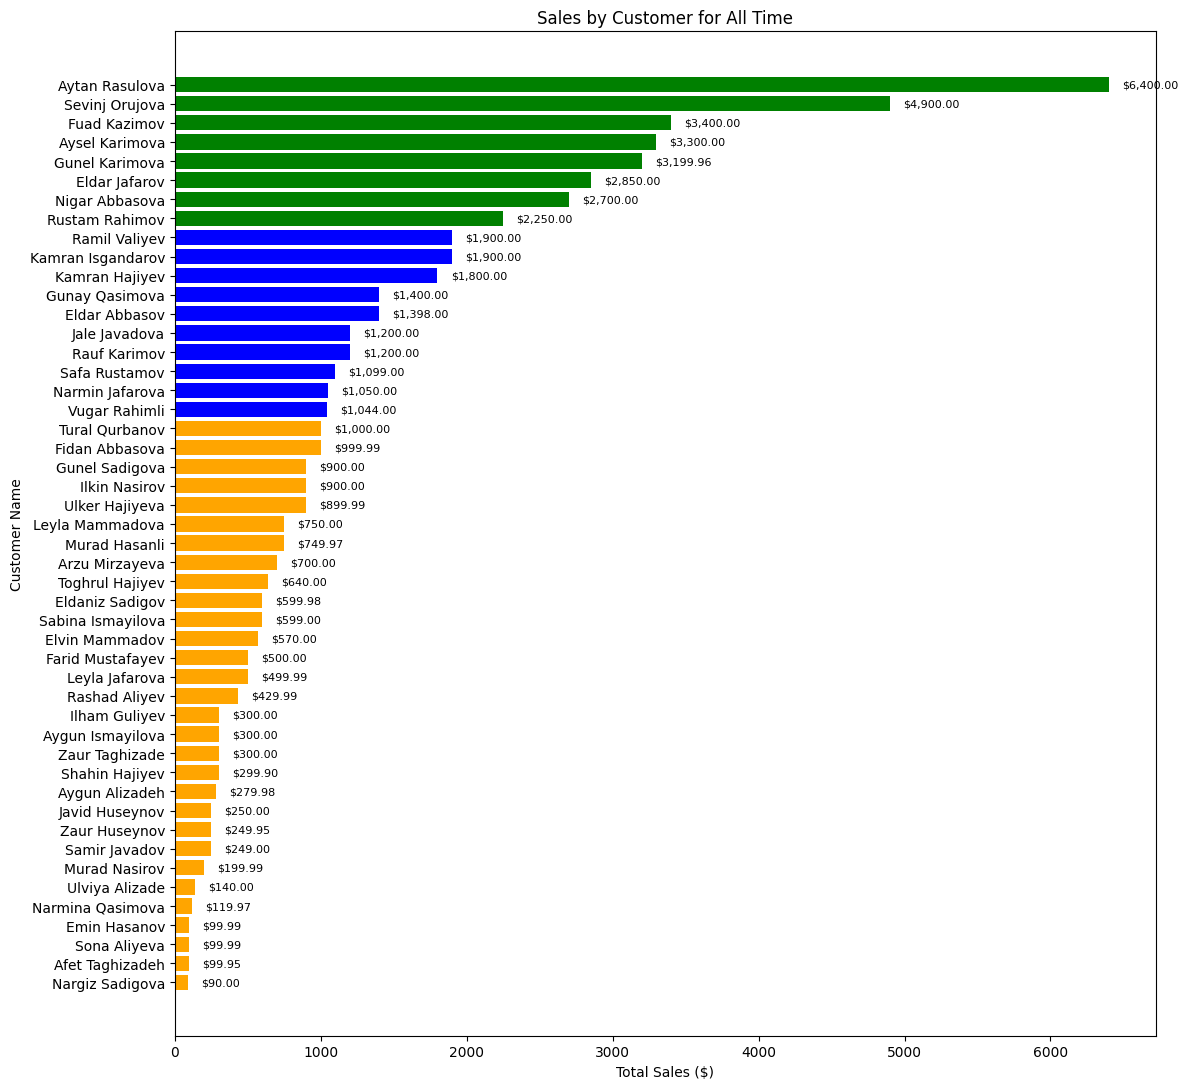

In [17]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt



# connection database
server = '.' 
database = 'sales_management' 
connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}};
SERVER={server};DATABASE={database};Trusted_Connection=yes'
connection = pyodbc.connect(connection_string)
cursor = connection.cursor()

# Query for sales by customer
sales_by_customer_query = """
SELECT 
    Customer.CustomerName, 
    SUM(OrderDetail.Price * OrderDetail.Quantity) AS TotalSales
FROM 
    Customer
JOIN 
    [Order] ON Customer.CustomerID = [Order].CustomerID
JOIN 
    OrderDetail ON [Order].OrderNumber = OrderDetail.OrderNumber
GROUP BY 
    Customer.CustomerName
ORDER BY 
    TotalSales DESC
"""
# Execute the query and load into a DataFrame
sales_by_customer_df = pd.read_sql(sales_by_customer_query, connection)

colors = [
    'green' if total > 2000 else 'blue' if 1000 < total <= 2000 else 'orange' 
    for total in sales_by_customer_df['TotalSales']
]
# Plotting 
plt.figure(figsize=(12, 11))
bars = plt.barh(sales_by_customer_df['CustomerName'], sales_by_customer_df['TotalSales'], color = colors)
plt.xlabel('Total Sales ($)')
plt.ylabel('Customer Name')
plt.title('Sales by Customer for All Time')
plt.gca().invert_yaxis()  

# Adding labels 
for bar in bars:
    plt.text(
        bar.get_width() + 90,  
        bar.get_y() + bar.get_height() / 2,  
        f"${bar.get_width():,.2f}", 
        va='center',  
        ha='left',  
        fontsize=8  
    )
plt.tight_layout()
plt.show()


connection.close()


Graph - Sales by State for All Time

C:\Users\user\AppData\Local\Temp\ipykernel_3220\541821956.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_by_state_df = pd.read_sql(sales_by_state_query, connection)


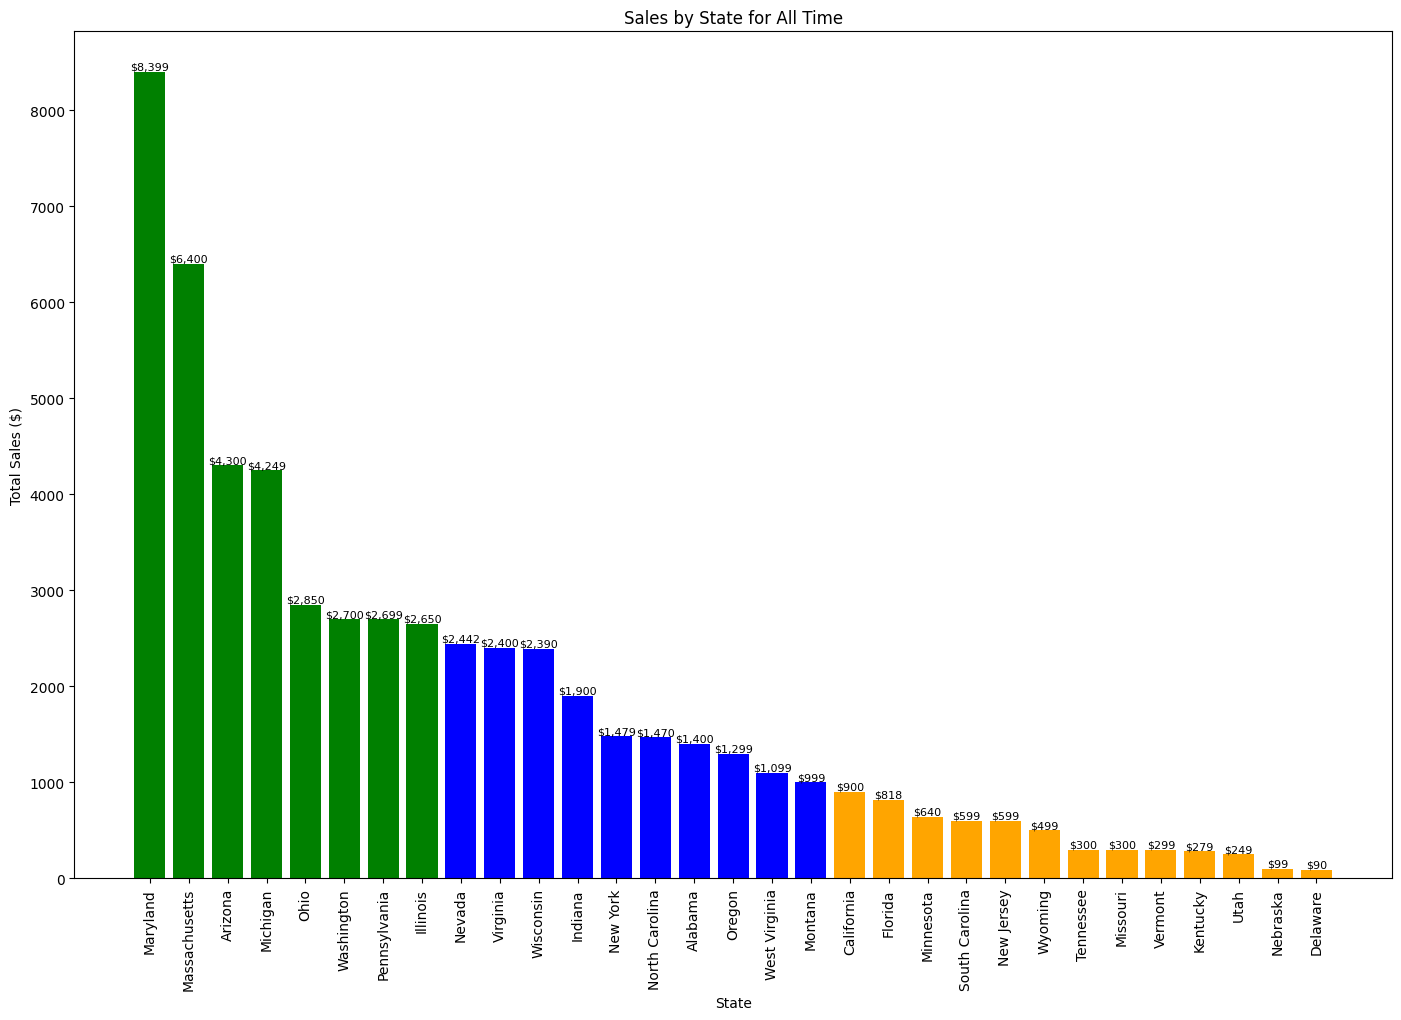

In [26]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt



# connection database
server = '.' 
database = 'sales_management' 
connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}};
SERVER={server};DATABASE={database};Trusted_Connection=yes'
connection = pyodbc.connect(connection_string)
cursor = connection.cursor()

# Query to calculate sales by state
sales_by_state_query = """
SELECT 
    State.StateName, 
    SUM(OrderDetail.Price * OrderDetail.Quantity) AS TotalSales
FROM 
    State
JOIN 
    Customer ON State.StateID = Customer.StateID
JOIN 
    [Order] ON Customer.CustomerID = [Order].CustomerID
JOIN 
    OrderDetail ON [Order].OrderNumber = OrderDetail.OrderNumber
GROUP BY 
    State.StateName
ORDER BY 
    TotalSales DESC
"""
# Execute the query and load into a DataFrame
sales_by_state_df = pd.read_sql(sales_by_state_query, connection)

colors = [
    'green' if total > 2000 else 'blue' if 1000 < total <= 2000 else 'orange' 
    for total in sales_by_customer_df['TotalSales']
]
# Plotting 
plt.figure(figsize=(17, 11))
bars = plt.bar(sales_by_state_df['StateName'], sales_by_state_df['TotalSales'], color = colors)
plt.xlabel('State')
plt.ylabel('Total Sales ($)')
plt.title('Sales by State for All Time')
plt.xticks(rotation=90)

# Adding labels
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(),  
        f"${int(bar.get_height()):,}",
        va='bottom',  
        ha='center',
        fontsize=8
    )
connection.close()